In [ ]:
import openai, os

api_key = os.environ.get("OPENAI_API_KEY")
if not api_key:
    raise ValueError("OPENAI_API_KEY environment variable not set!")

# Set your OpenAI key
client = openai.OpenAI(api_key=api_key)

def build_prompt(narrative: str) -> str:
    return f"""
You are a precise financial reasoning assistant. Your task is to extract exact financial reasoning steps from a free-form explanation and convert them into clearly labeled, structured steps. Focus only on the computational steps that directly contribute to the final answer. Omit any redundant comments or human-like speculation.

Extract the financial reasoning steps from the following narrative and return them in a structured format:

\"\"\"{narrative}\"\"\"

Return your answer in this format:
Step 1: ...
Step 2: ...
...
"""

def extract_reasoning_steps(narrative: str, model="gpt-4o-mini") -> str:
    prompt = build_prompt(narrative)
    chat_completion = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a financial reasoning extraction tool."},
            {"role": "user", "content": prompt}
        ],
        temperature=0
    )
    return chat_completion.choices[0].message.content.strip()

# Example usage
narrative = " \n\n## Thinking\n\nAlright, let's figure out the compound interest for David Brown's investment. First, I need to understand what we're dealing with here. He's investing $5517 into something related to Apple's iPhone launch, and it's growing at an annual interest rate of 2.13%. But here's the twist—this interest is compounded quarterly. So, that means we're looking at four compounding periods in a year.\n\nNow, let's break this down. We start with the principal amount, which is $5517. We need to apply the formula for compound interest, which is A = P(1 + r/n)^(nt), where A is the amount after time t, P is the principal amount, r is the annual interest rate, n is the number of times interest is compounded per year, and t is the time in years.\n\nOkay, let's plug in the numbers. We have P = $5517, r = 2.13%, n = 4 (since it's quarterly), and t = 1 year. So, the formula becomes A = 5517(1 + 0.0213/4)^(4*1). Let's simplify this a bit. The interest rate per period is 0.0213 divided by 4, which equals 0.005325.\n\nNext, I'll calculate the total growth factor, which is (1 + 0.005325)^4. Let me do the math here... Hmm, after calculating, I get approximately 1.02168971.\n\nNow, I'll multiply the principal amount by this growth factor to find the total amount after one year. So, 5517 times 1.02168971 equals approximately $5637.89.\n\nGreat, now I just need to figure out the compound interest itself. This is simply the difference between the final amount and the initial principal amount. So, $5637.89 minus $5517 gives us $120.89.\n\nAlright, that's it. The compound interest on David Brown's investment is $120.89.\n\n## Final Response\n\nThe compound interest on David Brown's investment in the Apple iPhone Launch is $120.89. This is calculated using the formula for compound interest, A = P(1 + r/n)^(nt), where A is the amount after time t, P is the principal amount, r is the annual interest rate, n is the number of times interest is compounded per year, and t is the time in years. With P = $5517, r = 2.13%, n = 4, and t = 1, the compound interest is found to be $120.89. This is the difference between the final amount after one year, approximately $5637.89, and the initial principal amount of $5517.  Therefore, the compound interest is $120.89. "

print(extract_reasoning_steps(narrative))


KeyboardInterrupt: 

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen3-8B"

# load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)

# prepare the model input
prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True # Switches between thinking and non-thinking modes. Default is True.
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

# conduct text completion
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 

# parsing thinking content
try:
    # rindex finding 151668 (</think>)
    index = len(output_ids) - output_ids[::-1].index(151668)
except ValueError:
    index = 0

thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

print("thinking content:", thinking_content)
print("content:", content)


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

thinking content: <think>
Okay, the user wants a short introduction to large language models. Let me start by defining what they are. They're AI systems trained on vast amounts of text data, right? So I should mention that they're based on deep learning and natural language processing.

I need to highlight their key features. They can understand and generate human-like text, which is important. Also, they can handle multiple languages. Maybe mention tasks like answering questions, writing stories, coding, and translating. 

Wait, should I include how they're trained? Maybe a bit about using neural networks with billions of parameters. But keep it concise since it's a short intro. Also, note their applications in various fields like customer service, content creation, and research. 

Don't forget to mention their limitations, like potential biases or lack of real-time data. But keep it brief. Make sure the language is simple and accessible, avoiding too much jargon. Let me structure it:

In [ ]:
from openai import OpenAI
# Set OpenAI's API key and API base to use vLLM's API server.
openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)

chat_response = client.chat.completions.create(
    model="Qwen/Qwen3-8B",
    messages=[
        {"role": "user", "content": "Give me a short introduction to large language models."},
    ],
    max_tokens=4000,
    temperature=0.6,
    top_p=0.95,
    extra_body={
        "top_k": 20,
    },
)
print("Chat response:", chat_response)

Chat response: ChatCompletion(id='chatcmpl-f4941a8632f4432ca2bbe0c5888c819f', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="<think>\nOkay, the user asked for a short introduction to large language models. Let me start by recalling what I know. Large language models are AI systems trained on vast amounts of text data. They can understand and generate human-like text. But how to explain this concisely?\n\nFirst, I should mention their size—like the number of parameters. Maybe mention that they're trained on diverse data sources. Then, their capabilities: answering questions, creating content, coding. Also, their applications in different fields. But keep it brief. Avoid jargon. Make sure it's accessible. Maybe start with a definition, then key features, and applications. Check if there's anything important I'm missing. Oh, maybe mention that they're part of the transformer architecture. But is that necessary for a short intro? Maybe 

In [ ]:
import os

# Set the path to the directory you want to check
directory_path = 'data/testset'

# Count files including in all subdirectories
total_files = sum(
    len(files) for _, _, files in os.walk(directory_path)
)

print(f"Total number of files (including subdirectories): {total_files}")



Total number of files (including subdirectories): 54


In [ ]:
!pwd

/home/zhuohanx/Projects/finsym


In [ ]:
x = "MetaMath (13B) & $0.2065_{0.17}$ & $0.1078_{0.09}$ & $0.1344_{0.11}$ & $0.186_{0.19}$ & $0.1863_{0.05}$ & $0.3064_{0.06}$ & $0.3753_{0.07}$ & $0.8728_{0.01}$\\\nWizardMath (7B) & $0.2756_{0.21}$ & $0.1671_{0.13}$ & $0.1975_{0.15}$ & $0.2582_{0.26}$ & $0.1933_{0.06}$ & $0.3142_{0.07}$ & $0.3737_{0.08}$ & $0.8723_{0.01}$\\"

In [ ]:
formattedx = ""
for line in x.split('\n'):
    items = line.split(' & ')
    items = [items[0]] + [items[4]] + items[1:4] + items[5:]
    formattedx += ' & '.join(items) + '\\\n'

In [ ]:
print(formattedx)

MetaMath (13B) & $0.186_{0.19}$ & $0.2065_{0.17}$ & $0.1078_{0.09}$ & $0.1344_{0.11}$ & $0.1863_{0.05}$ & $0.3064_{0.06}$ & $0.3753_{0.07}$ & $0.8728_{0.01}$\\
WizardMath (7B) & $0.2582_{0.26}$ & $0.2756_{0.21}$ & $0.1671_{0.13}$ & $0.1975_{0.15}$ & $0.1933_{0.06}$ & $0.3142_{0.07}$ & $0.3737_{0.08}$ & $0.8723_{0.01}$\\



In [70]:
reasoning_models = [
    # "deepseek_r1_distill_qwen_7b.jsonl",
    # "deepseek_r1_distill_llama_8b.jsonl",
    # "qwen_3_8b.jsonl",
    # "qwen3_30b_a3b.jsonl",
    # "deepseek_r1_distill_qwen_32b.jsonl",
    # "deepseek_r1_distill_llama_70b.jsonl",
    # "fino1_8b.jsonl",
    # "fin_r1.jsonl",
    "metamath_13b.jsonl",
    "wizardmath_7b.jsonl",
    # "o3-mini.jsonl",
    # "o4-mini.jsonl",
]

non_reasoning_models = [
    # "mistral_7b_instruct_v0p3.jsonl",
    # "qwen_2p5_7b.jsonl",
    # "mixtral_8x7b_instruct_v0p1.jsonl",
    # "llama3p1_8b_instruct.jsonl",
    # "gemma_2_9b_instruct.jsonl",
    # "gemma_2_27b_instruct.jsonl",
    # "gemma_3_27b_instruct.jsonl",
    # "llama3p1_70b_instruct.jsonl",
    # "llama3p3_70b_instruct.jsonl",
    # "gpt-4o-mini.jsonl",
    # "gpt-4.1-mini.jsonl",
    # "gpt-4.1.jsonl",
    # "wiroai_finance_qwen_7b.jsonl",
    # "wiroai_finance_llama_8b.jsonl",
    # "financeconnect_13b.jsonl",
    # "finance_llm_13b.jsonl",
    "mathstral_7b.jsonl",
    "qwen_25_math_7b.jsonl",
]

In [71]:
import pickle

topic_wise_results = pickle.load(open("./evals/topic_wise_results.pkl", "rb"))

topics = ["personal_finance", "fintech", "crypto_finance", "financial_markets", "accounting_and_financial_reporting", "finance_regulation", "financial_ratios", "risk_management", "mergers_and_acquisitions", "sustainable_finance", "corporate_finance", "investment_analysis"]

In [72]:
model_results = []

for model in non_reasoning_models:
    results = []
    for topic in topics:
        results.append(float(topic_wise_results[model][topic][0][0]))
    model_results.append(results)

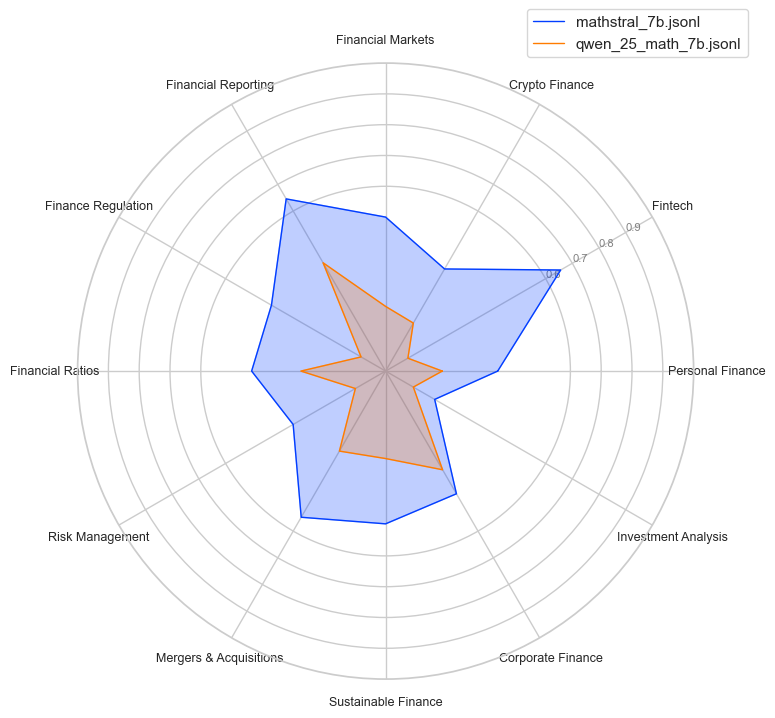

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use a Seaborn theme
sns.set_theme(style="whitegrid")

# Define 12 topics and model accuracies
topics = ["Personal Finance", "Fintech", "Crypto Finance", "Financial Markets", "Financial Reporting", "Finance Regulation", "Financial Ratios", "Risk Management", "Mergers & Acquisitions", "Sustainable Finance", "Corporate Finance", "Investment Analysis"]

# Prepare data
data = model_results
labels = non_reasoning_models
colors = sns.color_palette("bright", n_colors=len(non_reasoning_models))  # Seaborn color palette

# Compute angles
num_vars = len(topics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Append first value to close the circle
for i in range(len(data)):
    data[i] += data[i][:1]

# Initialize figure
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
# ax.spines['polar'].set_linewidth(2.5)

# Add topic labels
plt.xticks(angles[:-1], topics, size=9)

# Add radial gridlines
ax.set_rlabel_position(30)
plt.yticks([0.6, 0.7, 0.8, 0.9], ["0.6", "0.7", "0.8", "0.9"], color="gray", size=8)
plt.ylim(0, 1.0)

# Plot each model
for i, model in enumerate(data):
    ax.plot(angles, model, color=colors[i], linewidth=1, label=labels[i])
    ax.fill(angles, model, color=colors[i], alpha=0.25)

# Add title and legend
# plt.title("Accuracies of 3 Models Across 12 Topics", size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig('topic_performance_math_nonreasoning.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.tight_layout()
# plt.show()

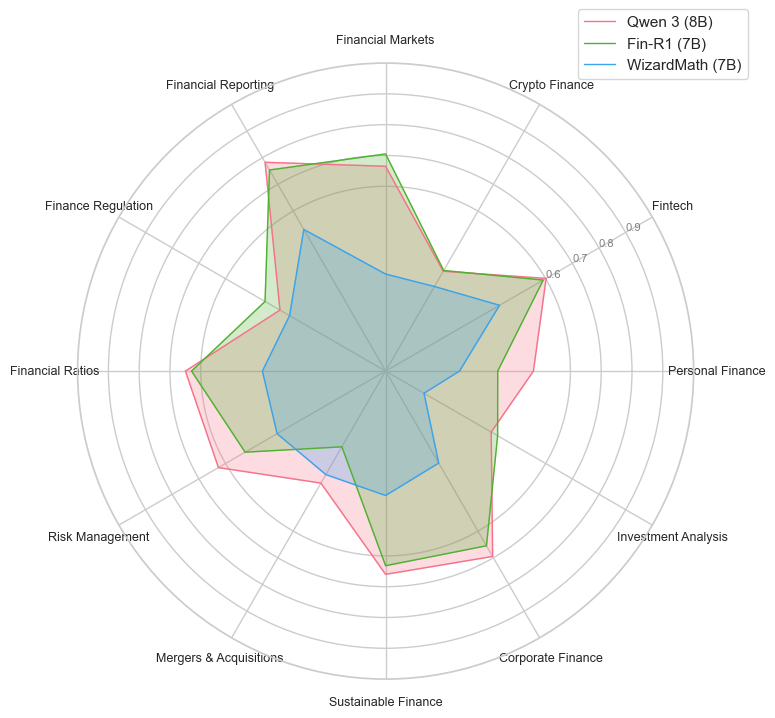

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use a Seaborn theme
sns.set_theme(style="whitegrid")

# Define 12 topics and model accuracies
topics = ["Personal Finance", "Fintech", "Crypto Finance", "Financial Markets", "Financial Reporting", "Finance Regulation", "Financial Ratios", "Risk Management", "Mergers & Acquisitions", "Sustainable Finance", "Corporate Finance", "Investment Analysis"]
model1 = [0.4800000000000001, 0.6018181818181818, 0.3742857142857142, 0.6649999999999998, 0.7827777777777778, 0.396, 0.6500000000000001, 0.6266666666666666, 0.4199999999999999, 0.66, 0.6950000000000002, 0.396]
model2 = [0.36400000000000005, 0.5909090909090909, 0.3771428571428571, 0.7050000000000001, 0.753888888888889, 0.452, 0.6300000000000001, 0.5266666666666666, 0.284, 0.632, 0.655, 0.41999999999999993]
model3 = [0.24000000000000005, 0.4272727272727273, 0.3171428571428571, 0.315, 0.5311111111111111, 0.36, 0.4000000000000001, 0.4066666666666665, 0.38799999999999996, 0.4039999999999999, 0.345, 0.14400000000000002]

# Prepare data
data = [model1, model2, model3]
labels = ['Qwen 3 (8B)', 'Fin-R1 (7B)', 'WizardMath (7B)']
colors = sns.color_palette("husl", n_colors=3)  # Seaborn color palette

# Compute angles
num_vars = len(topics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Append first value to close the circle
for i in range(len(data)):
    data[i] += data[i][:1]

# Initialize figure
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
# ax.spines['polar'].set_linewidth(2.5)

# Add topic labels
plt.xticks(angles[:-1], topics, size=9)

# Add radial gridlines
ax.set_rlabel_position(30)
plt.yticks([0.6, 0.7, 0.8, 0.9], ["0.6", "0.7", "0.8", "0.9"], color="gray", size=8)
plt.ylim(0, 1.0)

# Plot each model
for i, model in enumerate(data):
    ax.plot(angles, model, color=colors[i], linewidth=1, label=labels[i])
    ax.fill(angles, model, color=colors[i], alpha=0.25)

# Add title and legend
# plt.title("Accuracies of 3 Models Across 12 Topics", size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig('topic_performance_reasoning.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.tight_layout()
# plt.show()

In [ ]:
import json
models = ['gemma_3_27b_instruct.jsonl', 'wiroai_finance_qwen_7b.jsonl', 'mathstral_7b.jsonl']


for model in models:
    generations = []
    evals = []
    with open(f"results/{model}", "r") as f:
        for line in f:
            data = json.loads(line)
            generations.append(data)

    with open(f"evals/{model}", "r") as f:
        for line in f:
            data = json.loads(line)
            evals.append(data)

    data_combined = []
    for gen,eval in zip(generations, evals):
        dp = {**gen, **eval}
        dp = {k: v for k, v in dp.items() if k not in ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bertscore', 'bleuscore', 'step_final_answer_correct_acc']}
        if dp['topic'] == 'risk_management':
            data_combined.append(dp)

    with open(f"human_eval/{model}", "w") as f:
        for dp in data_combined:
            f.write(json.dumps(dp) + "\n")
    print(f"Finished processing {model}")

Finished processing gemma_3_27b_instruct.jsonl
Finished processing wiroai_finance_qwen_7b.jsonl
Finished processing mathstral_7b.jsonl


In [ ]:
import pickle

topic_wise_results = pickle.load(open("./evals/topic_wise_results.pkl", "rb"))

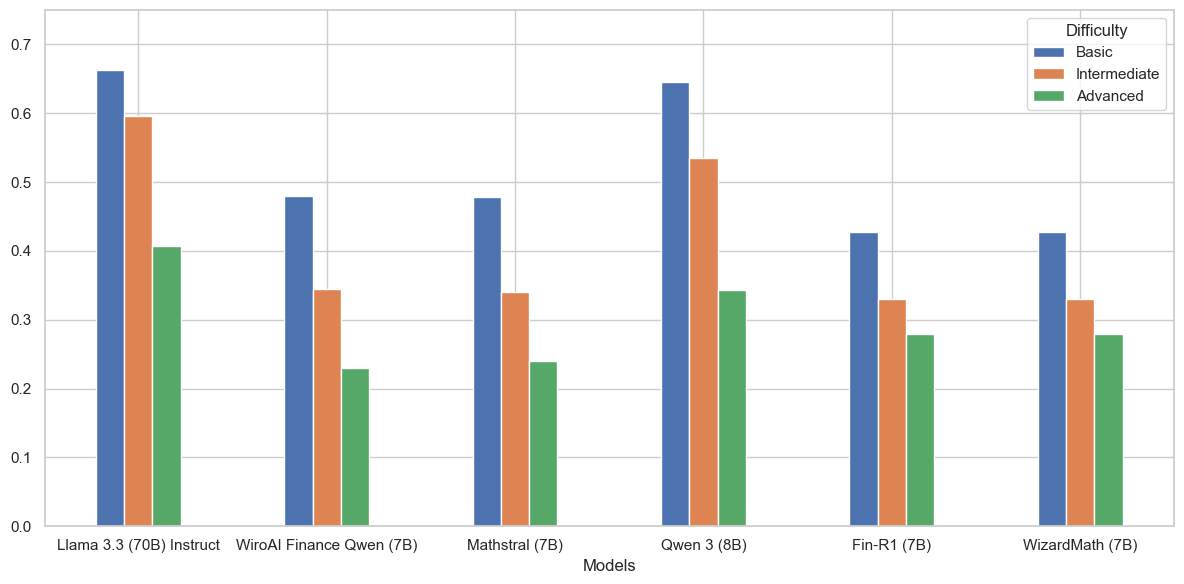

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['Llama 3.3 (70B) Instruct', 'WiroAI Finance Qwen (7B)', 'Mathstral (7B)', 'Qwen 3 (8B)', 'Fin-R1 (7B)', 'WizardMath (7B)']
difficulty_levels = ['Basic', 'Intermediate', 'Advanced']
# Each row is a model, each column is a difficulty level
data = [
    [0.6626168224299065, 0.5958463136033227, 0.4074074074074074],
    [0.47990654205607486, 0.3440290758047768, 0.22962962962962954],
    [0.47897196261682234, 0.3407580477673936, 0.24074074074074073],
    [0.6457943925233645, 0.5346313603322949, 0.34259259259259267],
    [0.4271028037383176, 0.33052959501557644, 0.2796296296296297],
    [0.4271028037383176, 0.33052959501557644, 0.2796296296296297]
]

data = np.array(data)
x = np.arange(len(models))  # the label locations
bar_width = 0.15

# Plotting bars
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(len(difficulty_levels)):
    ax.bar(x + i * bar_width, data[:, i], width=bar_width, label=difficulty_levels[i])

# Labels and titles
ax.set_ylim([0, 0.75])
ax.set_xlabel('Models')
# ax.set_ylabel('Performance')
# ax.set_title('Performance by Model and Difficulty Level')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(models) 
ax.legend(title='Difficulty')

plt.savefig('level_wise_performance.svg', format='svg', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()

In [ ]:
import json
models = ['gemma_3_27b_instruct.jsonl', 'wiroai_finance_qwen_7b.jsonl', 'mathstral_7b.jsonl']


for model in models:
    generations = []
    evals = []
    with open(f"results/{model}", "r") as f:
        for line in f:
            data = json.loads(line)
            generations.append(data)

    with open(f"evals/{model}", "r") as f:
        for line in f:
            data = json.loads(line)
            evals.append(data)

    data_combined = []
    for gen,eval in zip(generations, evals):
        dp = {**gen, **eval}
        dp = {k: v for k, v in dp.items() if k not in ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bertscore', 'bleuscore', 'step_final_answer_correct_acc']}
        if dp['topic'] == 'risk_management':
            data_combined.append(dp)

    with open(f"human_eval/{model}", "w") as f:
        for dp in data_combined:
            f.write(json.dumps(dp) + "\n")
    print(f"Finished processing {model}")

Finished processing gemma_3_27b_instruct.jsonl
Finished processing wiroai_finance_qwen_7b.jsonl
Finished processing mathstral_7b.jsonl


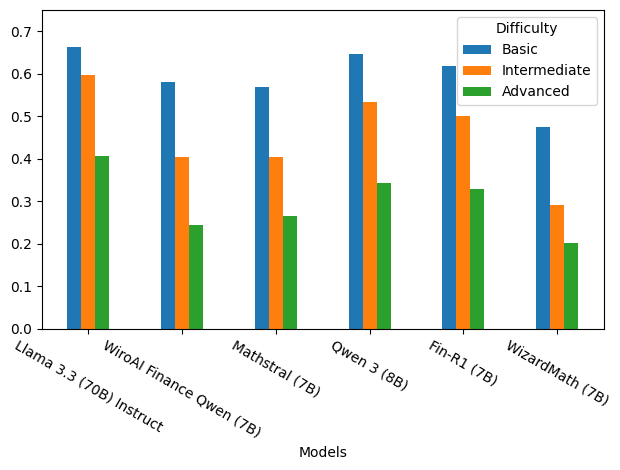

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['Llama 3.3 (70B) Instruct', 'WiroAI Finance Qwen (7B)', 'Mathstral (7B)', 'Qwen 3 (8B)', 'Fin-R1 (7B)', 'WizardMath (7B)']
difficulty_levels = ['Basic', 'Intermediate', 'Advanced']
# Each row is a model, each column is a difficulty level
data = [
    [0.6626168224299065, 0.5958463136033227, 0.4074074074074074],
    [0.5813084112149531, 0.40290758047767405, 0.2444444444444444],
    [0.5677570093457942, 0.40290758047767405, 0.2648148148148148],
    [0.6457943925233645, 0.5346313603322949, 0.34259259259259267],
    [0.6186915887850465, 0.5007268951194184, 0.3277777777777778],
    [0.4747663551401871, 0.29086188992731055, 0.20185185185185178]
]

data = np.array(data)
x = np.arange(len(models))  # the label locations
bar_width = 0.15

# Plotting bars
fig, ax = plt.subplots()
for i in range(len(difficulty_levels)):
    ax.bar(x + i * bar_width, data[:, i], width=bar_width, label=difficulty_levels[i])

# Labels and titles
ax.set_ylim([0, 0.75])
ax.set_xlabel('Models')
# ax.set_ylabel('Performance')
# ax.set_title('Performance by Model and Difficulty Level')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(models, rotation=-30) 
ax.legend(title='Difficulty')

plt.tight_layout()
plt.show()

In [ ]:
import json
from collections import defaultdict

# File paths (you can replace these with your actual file names)
file1_path = "results/qwen_2p5_7b.jsonl"  # e.g., the one with model scores
file2_path = "evals/qwen_2p5_7b.jsonl"  # e.g., the one with question/solution/generation
output_path = "error_analysis/qwen_2p5_7b.jsonl"  # e.g., the output file

# Read both files
with open(file1_path, "r") as f1:
    data1 = [json.loads(line) for line in f1 if line.strip()]

with open(file2_path, "r") as f2:
    data2 = [json.loads(line) for line in f2 if line.strip()]

# Group and merge only entries that have "id", "topic", and "subtopic"
grouped_data = defaultdict(dict)

for item in data1:
    if all(k in item for k in ["id", "topic", "subtopic"]):
        key = (item["id"], item["topic"], item["subtopic"])
        grouped_data[key].update(item)

for item in data2:
    if all(k in item for k in ["id", "topic", "subtopic"]):
        key = (item["id"], item["topic"], item["subtopic"])
        grouped_data[key].update(item)

# Write the merged results
with open(output_path, "w") as fout:
    for merged_item in grouped_data.values():
        fout.write(json.dumps(merged_item) + "\n")

print(f"Merged output saved to {output_path}")



Merged output saved to error_analysis/qwen_2p5_7b.jsonl


In [ ]:
import json
import pandas as pd

# Input and output file paths
input_path = "error_analysis/qwen_2p5_7b.jsonl"
output_path = "error_analysis/qwen_2p5_7b_lowest_100.jsonl"

# Load the JSONL file
with open(input_path, "r") as f:
    data = [json.loads(line) for line in f if line.strip()]

# Create a DataFrame
df = pd.DataFrame(data)

# Ensure the four metric columns exist; fill missing with 0
for col in ["recall", "precision", "final_answer_match", "step_final_answer_correct_acc"]:
    df[col] = df.get(col, 0).fillna(0)

# Compute combined score
df["combined_score"] = (
    df["recall"] +
    df["precision"] +
    df["final_answer_match"] +
    df["step_final_answer_correct_acc"]
)

# Sort by combined_score ascending (lowest first) and select bottom 100
lowest_100 = df.sort_values(by="combined_score", ascending=True).head(100)

# Save to output file as JSONL
with open(output_path, "w") as fout:
    for item in lowest_100.to_dict(orient="records"):
        fout.write(json.dumps(item) + "\n")

print(f"Lowest 100 entries saved to: {output_path}")


Lowest 100 entries saved to: error_analysis/qwen_2p5_7b_lowest_100.jsonl
